# Lecture 6. Support vector machine

## Previous lecture

- Quality mesures for regression problem
- Multicollinearity and regularization
- Probabilistic interpretation

## Problem statement

- Classification problem
$$
\frac{1}{N} \sum_{i=1}^N [y_i \neq f(x_i, w)] \to \min_w,
$$ 
where $x_i \in \mathbb{R}^n$ - sample, $y_i \in \{ +1, -1 \}$ - label

- Linear classifier

$$
f(x_i, w, b) = sign(w^{\top}x_i - b)
$$

- Margin of the $i$-th sample

$$
M_i(w, b) = y_i f(x_i, w, b)
$$

## How to formalize classification?  

- Tractable mathematical formulation
- Save underlying aim
- Refer to initial problem statement

### Approach 1: geometry
_1._ Assume that dataset is linearly separable
- Consider linear separation hyperplane
$$
\langle w, x \rangle + b = 0 
$$
- Linear separability constraint
$$
\exists w, b: \; y_i(\langle w, x_i \rangle + b) = M_i(w, b) > 0, \quad i = 1,\ldots,N
$$
- Normalization constraint
$$
\min_{i=1,\ldots,N} M_i(w, b) = 1
$$
- Geometric margin
$$
\{x : -1 \leq \langle w, x \rangle + b \leq 1 \}
$$
- Boundary samples
$$
\exists x_+, x_-: \langle w, x_{\pm} \rangle + b = \pm1 
$$
- Width of the geometric margin
$$
\frac{2}{\|w\|_2} \to \max
$$
- Final problem
$$
\begin{align*}
& \min \frac{1}{2}\|w\|_2^2\\
\text{s.t. } & M_i(w, b) \geq 1
\end{align*}
$$

_2._ Linearly nonseparated dataset

$$
\begin{align*}
& \min \frac{1}{2}\|w\|_2^2 + {\color{red}{C\sum_{i=1}^N \xi_i}}\\
\text{s.t. } & M_i(w, b) \geq 1 {\color{red}{- \xi_i}}\\
& {\color{red}{\xi_i \geq 0}}
\end{align*}
$$

### Approach 2: approximation + regularization

- Empirical risk upper bound
$$
\frac{1}{N} \sum_{i=1}^N [y_i \neq f(x_i, w)] \leq \underbrace{\frac{1}{N}\sum_{i=1}^N\max\{0,  1 - M_i\}}_{\text{approximation - hinge loss}} + \underbrace{\frac{1}{2C}\|w\|_2^2}_{\text{regularization}}
$$
- $\ell_1$-regularization is also used
- What is parameter $C$?

## Final SVM optimizaion problem

$$
\begin{align*}
& \min_{w, b, \xi} \frac{1}{2} \|w\|_2 + C \sum\limits_{i=1}^N \xi_i\\
\text{s.t. } & \xi_i \geq 0\\
& y_i(\langle w, x_i \rangle + b) \geq 1 - \xi_i
\end{align*}
$$

## Recap: KKT
On the whiteboard

## Why "support"?

- $M_i = 1$: sample is support and is located on the boundary
- $M_i < 1$: sample is support, but violate the decision
- $M_i > 1$: sample is uninformative

## Dual problem

- On the whiteboard
- Extension to the nonlinear classification
- Introduction to kernel, more details later in the course

## Synthetic examples

In [1]:
import numpy as np
import sklearn.datasets as skldata
import sklearn.svm as sklsvm
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.model_selection as sklms

In [2]:
n_samples = 500
n_features = 2

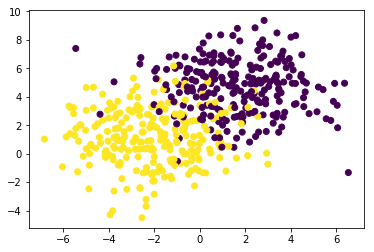

In [3]:
X_lin, y_lin = skldata.make_blobs(n_features=n_features, n_samples=n_samples, centers=2, cluster_std=2)
plt.scatter(X_lin[:, 0], X_lin[:, 1], c=y_lin)

In [4]:
def plot_separate_surf(X, y, clf, ax):
#     ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#                 facecolors='none', zorder=10, c="red")
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor="k")

    ax.axis('tight')
    x_min = min(X[:, 0])
    x_max = max(X[:, 0])
    y_min = min(X[:, 1])
    y_max = max(X[:, 1])

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_xticks(())
    ax.set_yticks(())

In [5]:
def study_kernels_C(X, y, C_list):
    fig = plt.figure(figsize=(15, 30))
    k = 1
    for C in C_list:
        clf = sklsvm.LinearSVC(C=C)
        clf.fit(X, y)
        ax = fig.add_subplot(len(C_list), 3, k)
        ax.set_title("C = {}".format(C))
        plot_separate_surf(X, y, clf, ax)
        k = k + 1
    fig.tight_layout()

In [6]:
C_list = [1e-3, 1e-2, 1e-1, 1, 10, 100]

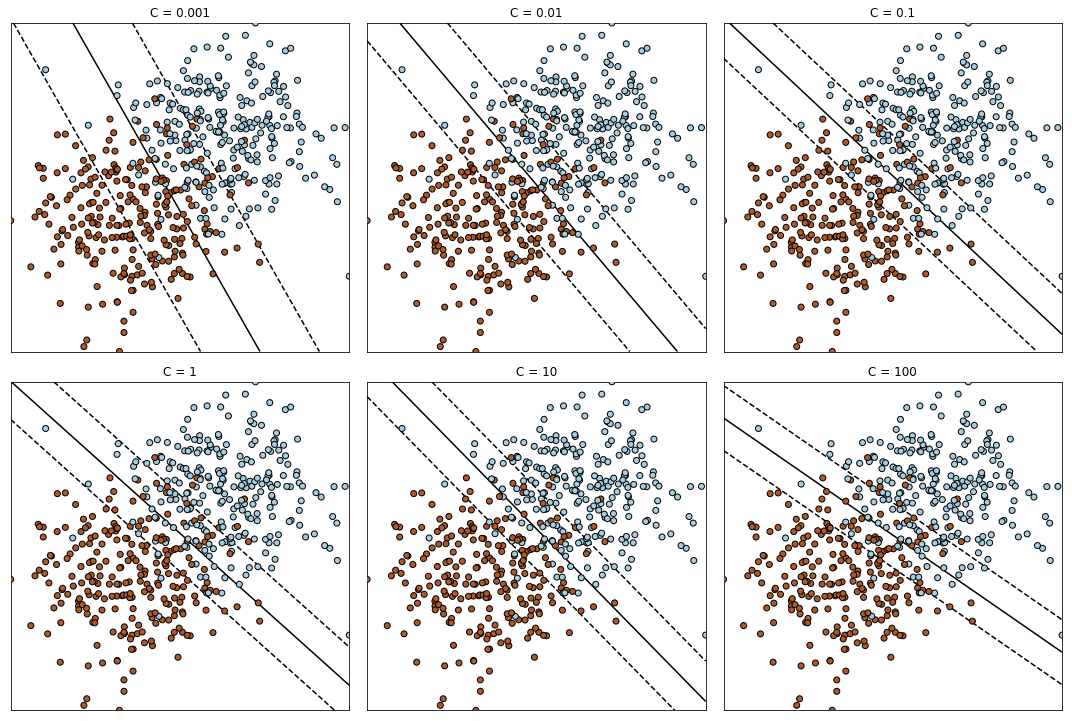

In [7]:
study_kernels_C(X_lin, y_lin, C_list)

## MNIST example

In [9]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./")

In [14]:
data = mnist["data"]
label = mnist["target"]
print("Number of pics = {}".format(X.shape[0]))

Number of pics = 70000


In [20]:
idx_subset = np.random.randint(0, X.shape[0], (30000,))
X = data[idx_subset, :]
y = label[idx_subset]

In [21]:
clf = sklsvm.LinearSVC()
scores = sklms.cross_val_score(estimator=clf, X=X, y=y, cv=5)
print("Mean accuracy = {} +- {}".format(np.mean(scores), np.std(scores)))

Mean accuracy = 0.9848667220351868 +- 0.0015606800834324964


## Summary

- Hinge loss and its geometric interpretation
- KKT and dual problem
- Kernel trick idea